In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("C:\\Users\\natha\\OneDrive\\Bureau\\Projet 3A Alstom\\metropt+3+dataset\\MetroPT3(AirCompressor).csv")

In [ ]:
print(df.head())
print(df.info())

In [ ]:
# valeurs manquantes ?

print(df.isnull().sum())

In [ ]:
print(df.columns)

In [ ]:
# J'essaie de commencer à voir à quoi les données ressemblent

df_sample = df.iloc[::1000, :]

# ici je prends une valeur toute les 1000 pour avoir un résultat rapide

plt.plot(df_sample["timestamp"], df_sample["Oil_temperature"])
plt.title("Évolution de la température d'huile")
plt.show()

In [ ]:
df_sample = df.iloc[::1000, :]

plt.plot(df_sample["timestamp"], df_sample["TP2"])
plt.show()

In [ ]:
df_sample = df.iloc[::1000, :]

plt.plot(df_sample["timestamp"], df_sample["TP3"])
plt.show()

In [ ]:
df_sample = df.iloc[::1000, :]

plt.plot(df_sample["timestamp"], df_sample["H1"])
plt.show()

In [ ]:
df_sample = df.iloc[::1000, :]

plt.plot(df_sample["timestamp"], df_sample["DV_pressure"])
plt.show()

In [ ]:
df_sample = df.iloc[::1000, :]

plt.plot(df_sample["timestamp"], df_sample["Reservoirs"])
plt.show()

In [ ]:
df_sample = df.iloc[::1000, :]

plt.plot(df_sample["timestamp"], df_sample["Motor_current"])
plt.show()


In [ ]:
df_sample = df.iloc[::1000, :]

plt.plot(df_sample["timestamp"], df_sample["COMP"])
plt.show()

In [ ]:
df_sample = df.iloc[::1000, :]

plt.plot(df_sample["timestamp"], df_sample["DV_eletric"])
plt.show()

In [ ]:
df_sample = df.iloc[::1000, :]

plt.plot(df_sample["timestamp"], df_sample["Towers"])
plt.show()

In [ ]:
df_sample = df.iloc[::1000, :]

plt.plot(df_sample["timestamp"], df_sample["MPG"])
plt.show()

In [ ]:
df_sample = df.iloc[::1000, :]

plt.plot(df_sample["timestamp"], df_sample["LPS"])
plt.show()

In [ ]:
df_sample = df.iloc[::1000, :]

plt.plot(df_sample["timestamp"], df_sample["Pressure_switch"])
plt.show()

In [ ]:
df_sample = df.iloc[::1000, :]

plt.plot(df_sample["timestamp"], df_sample["Oil_level"])
plt.show()

In [ ]:
df_sample = df.iloc[::1000, :]

plt.plot(df_sample["timestamp"], df_sample["Caudal_impulses"])
plt.show()

In [ ]:
# Colonnes à tracer

cols_to_plot = ["Oil_temperature", "TP2", "TP3"]

plt.figure(figsize=(15, 6))

# Tracer chaque colonne

for col in cols_to_plot:
    plt.plot(df_sample["timestamp"], df_sample[col], label=col)

plt.xlabel("Timestamp")
plt.ylabel("Valeurs")
plt.title("Évolution des variables (échantillon 1/1000)")
plt.legend()

# Choisir seulement 15 labels espacés (lisibilité de la légende sur l'axe x)

num_labels = 15
plt.xticks(
    df_sample["timestamp"].iloc[::len(df_sample)//num_labels],  # positions
    rotation=45,  # pivoter pour éviter chevauchement
    ha='right'    # aligner à droite
)

plt.tight_layout()
plt.show()

In [ ]:
for col in ["Oil_temperature", "TP2", "TP3", "H1", "DV_pressure"]:
    print(f"{col} : min = {df[col].min()}, max = {df[col].max()}")


In [ ]:

# Définir les anomalies connues (Data description Metro)
anomalies_known = pd.DataFrame({
    "start_time": ["2020-04-18 00:00", "2020-05-29 23:30", "2020-06-05 10:00", "2020-07-15 14:30"],
    "end_time":   ["2020-04-18 23:59", "2020-05-30 06:00", "2020-06-07 14:30", "2020-07-15 19:00"],
    "failure": ["Air leak", "Air leak", "Air leak", "Air leak"]
})

# Récupérer toutes les valeurs correspondant à ces anomalies
anomalies_values = pd.DataFrame()  # DataFrame vide pour stocker les résultats

for _, row in anomalies_known.iterrows():
    mask = (df["timestamp"] >= row["start_time"]) & (df["timestamp"] <= row["end_time"])
    subset = df.loc[mask].copy()
    subset["failure"] = row["failure"]
    anomalies_values = pd.concat([anomalies_values, subset])

# Réinitialiser l'index
anomalies_values.reset_index(drop=True, inplace=True)

print(anomalies_values)

In [ ]:
anomalies_known = [
    {"id": 1, "start": "2020-04-18 00:00", "end": "2020-04-18 23:59", "failure": "Air leak"},
    {"id": 2, "start": "2020-05-29 23:30", "end": "2020-05-30 06:00", "failure": "Air leak"},
    {"id": 3, "start": "2020-06-05 10:00", "end": "2020-06-07 14:30", "failure": "Air leak"},
    {"id": 4, "start": "2020-07-15 14:30", "end": "2020-07-15 19:00", "failure": "Air leak"},
]

# Grandeurs à afficher
cols_to_plot = [
    "TP2",
    "TP3",
    "DV_pressure",
    "Reservoirs",
    "Motor_current",
    "Oil_temperature",
    "DV_eletric"
]

# timestamp --> datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

for anomaly in anomalies_known:
    start, end = pd.to_datetime(anomaly["start"]), pd.to_datetime(anomaly["end"])
    df_window = df[(df["timestamp"] >= start) & (df["timestamp"] <= end)]
    
    plt.figure(figsize=(12, 6))
    for col in cols_to_plot:
        if col in df_window.columns:
            plt.plot(df_window["timestamp"], df_window[col], label=col)
    
    plt.title(f"Anomalie #{anomaly['id']} - {anomaly['failure']} ({anomaly['start']} → {anomaly['end']})")
    plt.xlabel("Temps")
    plt.ylabel("Valeurs")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# On devrait observer des pressions plus basses ou qui oscillent (TP3 et Reservoirs)
# On devrait avoir Oil temperature assez élevée
# On doit avoir Dv eletric toujours à 1

In [ ]:
anomaly_start = "2020-05-29 23:30"
anomaly_end = "2020-05-30 07:00"

df_window = df[(df["timestamp"] >= anomaly_start) & (df["timestamp"] <= anomaly_end)]

plt.figure(figsize=(14,6))
plt.plot(df_window["timestamp"], df_window["TP3"], label="TP3")
plt.plot(df_window["timestamp"], df_window["Reservoirs"], label="Reservoirs")
plt.legend()
plt.title("Zoom sur Air Leak #2 - TP3 vs Reservoirs")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_window = df[(df["timestamp"] >= start) & (df["timestamp"] <= end)]
df_window["delta_TP3_reservoirs"] = df_window["TP3"] - df_window["Reservoirs"]

plt.figure(figsize=(14,6))
plt.plot(df_window["timestamp"], df_window["delta_TP3_reservoirs"], label="TP3 - Reservoirs (écart de pression)")
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.title("Écart de pression pendant l'anomalie")
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calcul des statistiques
mean = df["TP3"].mean()
std = df["TP3"].std()

# Détection simple des anomalies (valeurs trop éloignées de la moyenne)
df["anomaly_TP3"] = abs(df["TP3"] - mean) > 2 * std

# zoom sur une fenêtre

# df_window = df[(df["timestamp"] >= "2020-05-29 23:30") & (df["timestamp"] <= "2020-05-30 06:00")]
# sinon, travail sur tout le dataset :
df_window = df

# Points normaux et anormaux
normal_points = df_window[~df_window["anomaly_TP3"]]
anomaly_points = df_window[df_window["anomaly_TP3"]]

plt.figure(figsize=(14,6))
plt.plot(normal_points["timestamp"], normal_points["TP3"], label="TP3 (normal)", linewidth=1)
plt.scatter(anomaly_points["timestamp"], anomaly_points["TP3"], color="red", label="Anomalies détectées", s=15)
plt.axhline(mean, color="green", linestyle="--", label="Moyenne")
plt.axhline(mean + 2*std, color="orange", linestyle="--", label="+2σ")
plt.axhline(mean - 2*std, color="orange", linestyle="--", label="-2σ")

plt.title("Détection de points anormaux sur la pression TP3")
plt.xlabel("Temps")
plt.ylabel("Pression (bar)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
anomaly_start = "2020-05-29 23:30"
anomaly_end = "2020-05-30 06:00"

df_window = df[(df["timestamp"] >= anomaly_start) & (df["timestamp"] <= anomaly_end)]

plt.figure(figsize=(14,6))
plt.plot(df_window["timestamp"], df_window["DV_pressure"], label="DV_pressure")
plt.plot(df_window["timestamp"], df_window["Motor_current"], label="Motor_current")
plt.legend()
plt.title("Zoom sur Air Leak #2 - DV_pressure vs Motor_current")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculs moy, std, ...


normal_df = df.copy()

for a in anomalies_known:
    start = pd.to_datetime(a["start"])
    end = pd.to_datetime(a["end"])
    mask = (normal_df["timestamp"] >= start) & (normal_df["timestamp"] <= end)
    normal_df = normal_df[~mask]

normal_df.reset_index(drop=True, inplace=True)


stats = normal_df[cols_to_plot].describe(percentiles=[0.01, 0.05, 0.95, 0.99])
print(stats)


start = "2020-05-29 23:30"
end   = "2020-05-30 06:00"

df_window = df[(df["timestamp"] >= start) & (df["timestamp"] <= end)]

compare = pd.DataFrame()

for col in cols_to_plot:
    compare.loc[col, "normal_min"] = stats.loc["1%", col]
    compare.loc[col, "normal_max"] = stats.loc["99%", col]
    compare.loc[col, "anom_min"] = df_window[col].min()
    compare.loc[col, "anom_max"] = df_window[col].max()
    compare.loc[col, "ratio_outside"] = (
        (df_window[col] < stats.loc["1%", col]) |
        (df_window[col] > stats.loc["99%", col])
    ).mean()

print(compare)


rules = {}

for col in cols_to_plot:
    rules[col] = {
        "low_limit": stats.loc["1%", col],
        "high_limit": stats.loc["99%", col]
    }

print(rules)


In [ ]:
# Je veux comprendre les anomalies, je vais donc raisonner pas à pas

# Extraction de la fenêtre d'anomalie
# Calcul dérivées
# Visualisation de plusieurs grandeurs
# Analyse statistique locale
# Heatmaps de corrélations

# +1 : corr positive parfaite
# -1 : corr négative aprfaite
# 0 : pas de lien

# Rappels :

#TP3 : pression sortie compresseur
# Reservoirs : pression des réservoirs
# DV_pressure : pression de la valve
# Motor_current : intensité moteur
# H1 : capteur mécanique / pressostat

# Hypothèses Air Leak :

# une chute de TP3
# une chute de Reservoirs
# une augmentation de Motor_current (le moteur force)
# fluctuations irrégulières de DV_pressure
# éventuellement H1 s’active/anomalises selon le niveau de pression

# TP3 vs Reservoirs : 

# corr forte positive : presions varient ensemble : NORMAL
# corr faiblit pdt anomalie : compresseur produit de la pression mais les reservoirs ne se remplissent pas : ANOMALIE

# Motor_current vs TP3 ou Reservoirs :

# corr neg pendant anomalie : Motor_current augmente pendant que les pressiosn chutent : moteur compresse mais pression ne monte pas : ANOMALIE
# corr proche de zéro : le moteur varie peu : aps d'emballement : NORMAL

# DV_pressure vs TP3 ou Reservoirs :

# Corrélation positive : la valve réagit normalement avec les pressions : NORMAL
# Corrélation faible ou négative : la valve compense, s’ouvre, se ferme anormalement : ANOMALIE

# Le cas H1 :

# NORMAL : H1 est assez corrélé avec TP3 / DV_pressure / Reservoirs : pdt fonc normal, H1 dépend de du cycle de décharge
# ANOMALIE : Le cycle de décharge du filtre ne suit plus la dynamique normale : perte de corrélation avec plusieurs variables


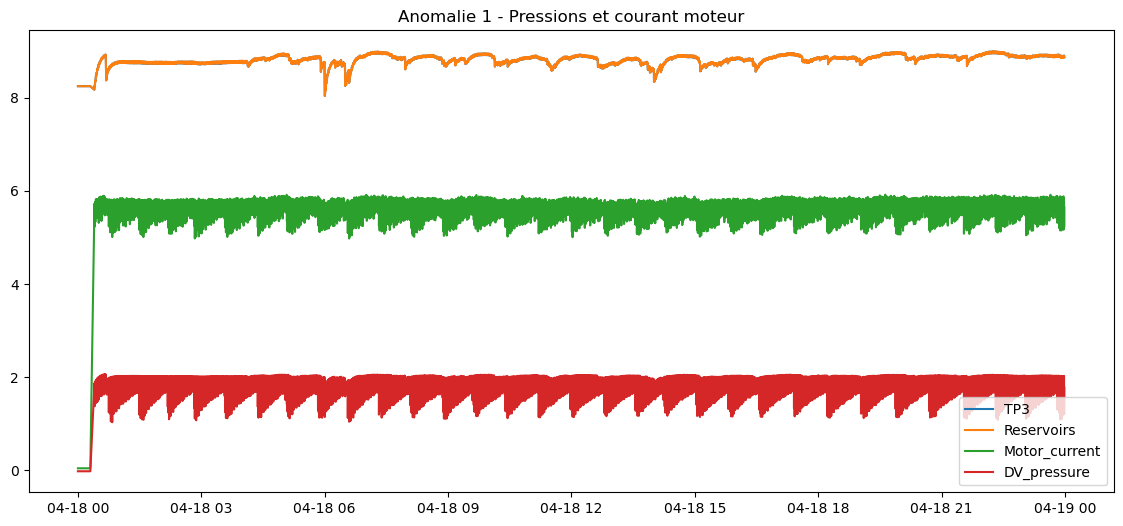

,TP3,Reservoirs,Motor_current,DV_pressure,H1
min,8.038000,8.040000,0.040000,-0.024000,-0.014000
max,8.998000,8.998000,5.917500,2.064000,8.238000
mean,8.811901,8.812990,5.604374,1.879373,0.079266
std,0.114157,0.114238,0.598537,0.285173,0.840971


In [108]:
# Anomalie 1
a1_start = "2020-04-18 00:00"
a1_end   = "2020-04-18 23:59"

a1 = df[(df["timestamp"] >= a1_start) & (df["timestamp"] <= a1_end)].copy()
a1.head()

a1["dTP3"] = a1["TP3"].diff()
a1["dReservoirs"] = a1["Reservoirs"].diff()
a1["dMotor"] = a1["Motor_current"].diff()
a1["dDV"] = a1["DV_pressure"].diff()
a1["dH1"] = a1["H1"].diff()
a1.describe()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(a1["timestamp"], a1["TP3"], label="TP3")
plt.plot(a1["timestamp"], a1["Reservoirs"], label="Reservoirs")
plt.plot(a1["timestamp"], a1["Motor_current"], label="Motor_current")
plt.plot(a1["timestamp"], a1["DV_pressure"], label="DV_pressure")
plt.legend()
plt.title("Anomalie 1 - Pressions et courant moteur")
plt.show()

a1_stats = a1[["TP3","Reservoirs","Motor_current","DV_pressure","H1"]].agg(["min","max","mean","std"])
a1_stats


In [ ]:
# Anomalie 2
a2_start = "2020-05-29 23:30"
a2_end   = "2020-05-30 06:00"

a2 = df[(df["timestamp"] >= a2_start) & (df["timestamp"] <= a2_end)].copy()
a2.head()

a2["dTP3"] = a2["TP3"].diff()
a2["dReservoirs"] = a2["Reservoirs"].diff()
a2["dMotor"] = a2["Motor_current"].diff()
a2["dDV"] = a2["DV_pressure"].diff()
a2["dH1"] = a2["H1"].diff()
a2.describe()

plt.figure(figsize=(14,6))
plt.plot(a2["timestamp"], a2["TP3"], label="TP3")
plt.plot(a2["timestamp"], a2["Reservoirs"], label="Reservoirs")
plt.plot(a2["timestamp"], a2["Motor_current"], label="Motor_current")
plt.plot(a2["timestamp"], a2["DV_pressure"], label="DV_pressure")
plt.legend()
plt.title("Anomalie 2 - Pressions et courant moteur")
plt.show()

a2_stats = a2[["TP3","Reservoirs","Motor_current","DV_pressure","H1"]].agg(["min","max","mean","std"])
a2_stats


In [ ]:
# Anomalie 3
a3_start = "2020-06-05 10:00"
a3_end   = "2020-06-07 14:30"

a3 = df[(df["timestamp"] >= a3_start) & (df["timestamp"] <= a3_end)].copy()
a3.head()

a3["dTP3"] = a3["TP3"].diff()
a3["dReservoirs"] = a3["Reservoirs"].diff()
a3["dMotor"] = a3["Motor_current"].diff()
a3["dDV"] = a3["DV_pressure"].diff()
a3["dH1"] = a3["H1"].diff()
a3.describe()

plt.figure(figsize=(14,6))
plt.plot(a3["timestamp"], a3["TP3"], label="TP3")
plt.plot(a3["timestamp"], a3["Reservoirs"], label="Reservoirs")
plt.plot(a3["timestamp"], a3["Motor_current"], label="Motor_current")
plt.plot(a3["timestamp"], a3["DV_pressure"], label="DV_pressure")
plt.legend()
plt.title("Anomalie 3 - Pressions et courant moteur")
plt.show()

a3_stats = a3[["TP3","Reservoirs","Motor_current","DV_pressure","H1"]].agg(["min","max","mean","std"])
a3_stats


In [ ]:
# Anomalie 4
a4_start = "2020-07-15 14:30"
a4_end   = "2020-07-15 19:00"

a4 = df[(df["timestamp"] >= a4_start) & (df["timestamp"] <= a4_end)].copy()
a4.head()

a4["dTP3"] = a4["TP3"].diff()
a4["dReservoirs"] = a4["Reservoirs"].diff()
a4["dMotor"] = a4["Motor_current"].diff()
a4["dDV"] = a4["DV_pressure"].diff()
a4["dH1"] = a4["H1"].diff()
a4.describe()

plt.figure(figsize=(14,6))
plt.plot(a4["timestamp"], a4["TP3"], label="TP3")
plt.plot(a4["timestamp"], a4["Reservoirs"], label="Reservoirs")
plt.plot(a4["timestamp"], a4["Motor_current"], label="Motor_current")
plt.plot(a4["timestamp"], a4["DV_pressure"], label="DV_pressure")
plt.legend()
plt.title("Anomalie 4 - Pressions et courant moteur")
plt.show()

a4_stats = a4[["TP3","Reservoirs","Motor_current","DV_pressure","H1"]].agg(["min","max","mean","std"])
a4_stats


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

anom_dict = {"A1": a1, "A2": a2, "A3": a3, "A4": a4}
cols_corr = ["TP3","Reservoirs","Motor_current","DV_pressure","H1"]

for name, df_anom in anom_dict.items():
    plt.figure(figsize=(7,6))
    sns.heatmap(df_anom[cols_corr].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f"Heatmap de corrélation - {name}")
    plt.show()


In [ ]:
# Je veux maintenant comparer les heatmaps normales avec les anomalies

In [ ]:
cols = ["TP2","TP3","Reservoirs","DV_pressure","Motor_current","H1"]
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [ ]:
# fenêtres Normal/Anomalie 1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["TP2","TP3","Reservoirs","DV_pressure","Motor_current","H1"]

# Fenêtre de l'anomalie #1
start = pd.to_datetime("2020-04-18 00:00")
end   = pd.to_datetime("2020-04-18 23:59")

df_anom1 = df[(df["timestamp"] >= start) & (df["timestamp"] <= end)]

# Fenêtre normale = 24h AVANT l'anomalie
df_norm1 = df[(df["timestamp"] >= start - pd.Timedelta(hours=24)) &
              (df["timestamp"] < start)]

# Heatmap Normal

plt.figure(figsize=(8,6))
sns.heatmap(df_norm1[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("ANOMALIE 1 ― Heatmap (Normal, avant anomalie)")
plt.show()

# Heatmap Anomalie

plt.figure(figsize=(8,6))
sns.heatmap(df_anom1[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("ANOMALIE 1 ― Heatmap (Pendant l'anomalie Air Leak)")
plt.show()

# Comapraison

fig, ax = plt.subplots(1,2, figsize=(14,6))

sns.heatmap(df_norm1[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax[0])
ax[0].set_title("Normal (Avant Anomalie #1)")

sns.heatmap(df_anom1[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax[1])
ax[1].set_title("Anomalie #1 (Air Leak)")

plt.show()

# ANOMALIES :

# H1 se décorrèle de plusieurs variables



In [ ]:
start = pd.to_datetime("2020-05-29 23:30")
end   = pd.to_datetime("2020-05-30 06:00")

df_anom2 = df[(df["timestamp"] >= start) & (df["timestamp"] <= end)]
df_norm2 = df[(df["timestamp"] >= start - pd.Timedelta(hours=24)) &
              (df["timestamp"] < start)]

plt.figure(figsize=(8,6))
sns.heatmap(df_norm2[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("ANOMALIE 2 ― Heatmap (Normal)")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df_anom2[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("ANOMALIE 2 ― Heatmap (Pendant Air Leak)")
plt.show()

fig, ax = plt.subplots(1,2, figsize=(14,6))

sns.heatmap(df_norm2[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax[0])
ax[0].set_title("Normal (Avant Anomalie #2)")

sns.heatmap(df_anom2[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax[1])
ax[1].set_title("Anomalie #2 (Air Leak)")

plt.show()


# ANOMALIES :

# Motor_current vs TP3 ou Reservoirs : corr neg pendant anomalie
# Corrélation faible ou négative : la valve compense, s’ouvre, se ferme anormalement : ANOMALIE


In [ ]:
start = pd.to_datetime("2020-06-05 10:00")
end   = pd.to_datetime("2020-06-07 14:30")

df_anom3 = df[(df["timestamp"] >= start) & (df["timestamp"] <= end)]
df_norm3 = df[(df["timestamp"] >= start - pd.Timedelta(hours=24)) &
              (df["timestamp"] < start)]

plt.figure(figsize=(8,6))
sns.heatmap(df_norm3[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("ANOMALIE 3 ― Heatmap (Normal)")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df_anom3[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("ANOMALIE 3 ― Heatmap (Pendant Air Leak)")
plt.show()

fig, ax = plt.subplots(1,2, figsize=(14,6))

sns.heatmap(df_norm3[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax[0])
ax[0].set_title("Normal (Avant Anomalie #3)")

sns.heatmap(df_anom3[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax[1])
ax[1].set_title("Anomalie #3 (Air Leak)")

plt.show()

# ANOMALIES :

# H1 se décorrèle de plusieurs variables


In [ ]:
start = pd.to_datetime("2020-07-15 14:30")
end   = pd.to_datetime("2020-07-15 19:00")

df_anom4 = df[(df["timestamp"] >= start) & (df["timestamp"] <= end)]
df_norm4 = df[(df["timestamp"] >= start - pd.Timedelta(hours=24)) &
              (df["timestamp"] < start)]

plt.figure(figsize=(8,6))
sns.heatmap(df_norm4[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("ANOMALIE 4 ― Heatmap (Normal)")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df_anom4[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("ANOMALIE 4 ― Heatmap (Pendant Air Leak)")
plt.show()

fig, ax = plt.subplots(1,2, figsize=(14,6))

sns.heatmap(df_norm4[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax[0])
ax[0].set_title("Normal (Avant Anomalie #4)")

sns.heatmap(df_anom4[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax[1])
ax[1].set_title("Anomalie #4 (Air Leak)")

plt.show()


In [ ]:
# Courbes de corrélations qui évoluent dans le temps

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def rolling_corr(df, col1, col2, window):
    """
    Calcule la corrélation glissante entre col1 et col2.
    window = nombre de points dans la fenêtre.
    """
    return df[col1].rolling(window).corr(df[col2])

window = 1000  # tu peux augmenter ou diminuer

df["corr_TP3_Res"] = rolling_corr(df, "TP3", "Reservoirs", window)

plt.figure(figsize=(14,6))
plt.plot(df["timestamp"], df["corr_TP3_Res"], label=f"Rolling Corr (TP3 vs Reservoirs) - window={window}")
plt.axhline(0, color="black", linestyle="--")
plt.ylim(-1,1)
plt.title("Corrélation glissante : TP3 vs Reservoirs")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

window = 1000

pairs = [
    ("TP3", "Reservoirs"),
    ("TP2", "TP3"),
    ("DV_pressure", "Motor_current"),
    ("H1", "TP3")
]

for col1, col2 in pairs:
    df[f"corr_{col1}_{col2}"] = rolling_corr(df, col1, col2, window)
    
    plt.figure(figsize=(14,5))
    plt.plot(df["timestamp"], df[f"corr_{col1}_{col2}"], label=f"{col1} vs {col2}")
    plt.axhline(0, color="black", linestyle="--")
    plt.ylim(-1,1)
    plt.title(f"Corrélation glissante : {col1} vs {col2} (window={window})")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

anomalies = [
    ("2020-04-18 00:00", "2020-04-18 23:59"),
    ("2020-05-29 23:30", "2020-05-30 06:00"),
    ("2020-06-05 10:00", "2020-06-07 14:30"),
    ("2020-07-15 14:30", "2020-07-15 19:00"),
]

for i, (start, end) in enumerate(anomalies, start=1):
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    
    df_window = df[(df["timestamp"] >= start - pd.Timedelta(hours=6)) &
                   (df["timestamp"] <= end + pd.Timedelta(hours=6))]
    
    plt.figure(figsize=(14,5))
    plt.plot(df_window["timestamp"], df_window["corr_TP3_Res"], label="TP3 vs Reservoirs")
    plt.axvspan(start, end, color="red", alpha=0.2, label="Anomalie")
    plt.title(f"Évolution corrélation TP3-Reservoirs autour de l'anomalie #{i}")
    plt.legend()
    plt.ylim(-1,1)
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Calcul des corrélations glissantes essentielles

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Choisis ici une fenêtre (500 à 2000 selon ton sampling)
window = 1000

pairs = [
    ("TP3", "Reservoirs"),
    ("TP2", "TP3"),
    ("DV_pressure", "Motor_current"),
    ("H1", "TP3")
]

# Fonction corrélation glissante
def rolling_corr(df, col1, col2, window):
    return df[col1].rolling(window).corr(df[col2])

# Calcul pour chaque paire
for c1, c2 in pairs:
    df[f"corr_{c1}_{c2}"] = rolling_corr(df, c1, c2, window)


In [ ]:
# Score d'anomalies basé sur rupture de corrélation

In [106]:
scores = []

for c1, c2 in pairs:
    col = f"corr_{c1}_{c2}"

    # dérivée = variation de corrélation → rupture
    deriv = df[col].diff().abs()

    # inversion ou perte de corrélation
    drop = (1 - df[col].abs()).clip(lower=0)

    scores.append(deriv + drop)

# Score final = moyenne normalisée des contributions
df["anomaly_score"] = np.nanmean(scores, axis=0)
df["anomaly_score"] = (df["anomaly_score"] - df["anomaly_score"].min()) / (df["anomaly_score"].max() - df["anomaly_score"].min())


C:\Users\natha\AppData\Local\Temp\ipykernel_7132\1821199252.py:15: RuntimeWarning: Mean of empty slice
  df["anomaly_score"] = np.nanmean(scores, axis=0)


In [ ]:
# Définition des zones d'anomalies connues 

In [ ]:
anomalies = [
    ("2020-04-18 00:00", "2020-04-18 23:59"),
    ("2020-05-29 23:30", "2020-05-30 06:00"),
    ("2020-06-05 10:00", "2020-06-07 14:30"),
    ("2020-07-15 14:30", "2020-07-15 19:00"),
]

anomalies = [(pd.to_datetime(s), pd.to_datetime(e)) for s, e in anomalies]


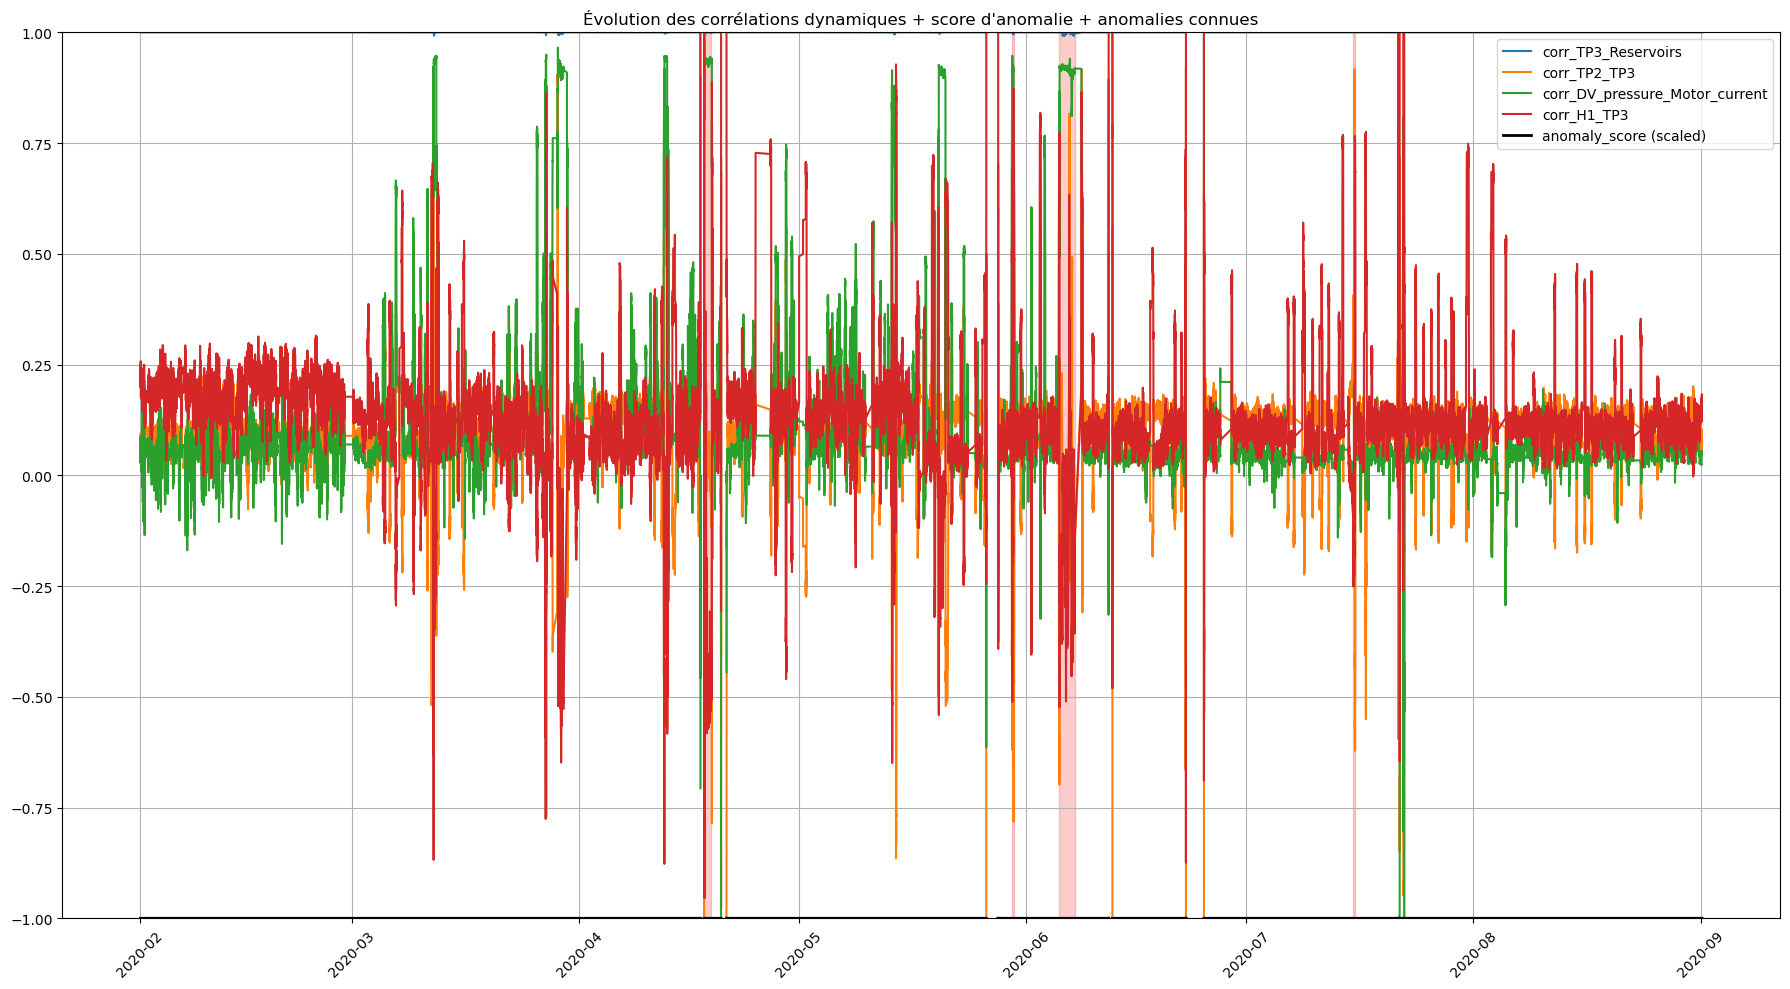

In [107]:
plt.figure(figsize=(18,10))

# Tracer les corrélogrammes
for c1, c2 in pairs:
    col = f"corr_{c1}_{c2}"
    plt.plot(df["timestamp"], df[col], label=col)

# Tracer le score d'anomalie (mis à l'échelle pour être visible)
plt.plot(df["timestamp"],
         df["anomaly_score"] * 2 - 1,  # transformé pour occuper [-1,1]
         color="black",
         linewidth=2,
         label="anomaly_score (scaled)")

# Zones rouges = anomalies connues
for start, end in anomalies:
    plt.axvspan(start, end, color="red", alpha=0.2)

plt.title("Évolution des corrélations dynamiques + score d'anomalie + anomalies connues")
plt.legend()
plt.ylim(-1, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# --- 1) Charger les données ---
df = pd.read_csv("C:\\Users\\natha\\OneDrive\\Bureau\\Projet 3A Alstom\\metropt+3+dataset\\MetroPT3(AirCompressor).csv")

# Assurer que le timestamp est bien en datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

# --- 2) Définir les 4 anomalies ---
anomalies = [
    {"start": "2020-04-18 00:00", "end": "2020-04-18 23:59"},
    {"start": "2020-05-29 23:30", "end": "2020-05-30 06:00"},
    {"start": "2020-06-05 10:00", "end": "2020-06-07 14:30"},
    {"start": "2020-07-15 14:30", "end": "2020-07-15 19:00"},
]

# --- 3) Construire un masque qui exclut toutes les anomalies ---
mask_normal = pd.Series(True, index=df.index)

for a in anomalies:
    start = pd.to_datetime(a["start"])
    end   = pd.to_datetime(a["end"])
    mask_normal &= ~((df["timestamp"] >= start) & (df["timestamp"] <= end))

# --- 4) Dataset "normal" ---
df_normal = df[mask_normal].copy()

print("Taille du dataset normal :", len(df_normal))
print(df_normal.head())


In [ ]:
normal_stats = df_normal.describe().loc[["mean", "std", "min", "max"]]
normal_stats


In [ ]:
def anomaly_score(series, mean, std):
    return abs(series - mean) / std


In [ ]:
score_tp3 = anomaly_score(df_window["TP3"], normal_stats.loc["mean","TP3"], normal_stats.loc["std","TP3"])


In [ ]:
corr_normal = df_normal[cols].corr()

corr_anomaly = df_window[cols].corr()

corr_diff = abs(corr_anomaly - corr_normal)


In [ ]:
corr_diff.stack().sort_values(ascending=False).head(10)


In [ ]:
# Convertir en valeur numérique, forcer errors='coerce' → transforme ce qui n'est pas un nombre en NaN
series = pd.to_numeric(df_window[col], errors='coerce')

# Calcul du score
score = anomaly_score(series, mean, std)

# Le max : mais ignorer les NaN
max_score = score.max(skipna=True)


In [ ]:
def explain_anomaly(df_window, normal_stats, corr_diff, threshold_std=3, corr_threshold=0.3):
    explanations = []

    for col in df_window.columns:
        if col not in normal_stats.columns:
            continue
        
        mean = normal_stats.loc["mean", col]
        std  = normal_stats.loc["std", col]
        
        # Score d'écart
        max_score = anomaly_score(df_window[col], mean, std).max()

        if pd.notna(max_score) and max_score > threshold_std:
            explanations.append(
                f"- **{col} anormal** : écart maximal de **{max_score:.1f} σ** par rapport au fonctionnement normal"
            )

    # Rupture de corrélation
    ruptures = corr_diff[corr_diff > corr_threshold]

    for (var1, var2), diff in ruptures.stack().items():
        explanations.append(
            f"- **Rupture de corrélation {var1} ↔ {var2}** : changement de **{diff:.2f}**"
        )

    return explanations


In [ ]:
explanations = explain_anomaly(df_window, normal_stats, corr_diff)

print("ANOMALIE", anomaly_id)
for e in explanations:
    print(e)
